In [209]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
%matplotlib inline

In [163]:
x = torch.tensor(2.0, requires_grad=True)

In [164]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

In [165]:
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [166]:
y.backward()

In [167]:
x.grad

tensor(93.)

In [168]:
x = torch.tensor([[1.,2.,3.],[3.,2.,1.]], requires_grad=True)

In [169]:
x

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)

In [170]:
y = 3*x+2

In [171]:
y

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)

In [172]:
z = 2*y**2

In [173]:
z

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)

In [174]:
out = z.mean()

In [175]:
out

tensor(140., grad_fn=<MeanBackward0>)

In [176]:
out.backward()

In [177]:
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


In [178]:
X = torch.linspace(1, 50, 50).reshape(-1,1)

In [179]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [180]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [181]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [182]:
y = 2*X + 1 + e

In [183]:
y.shape

torch.Size([50, 1])

In [184]:
y

tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.],
        [25.],
        [28.],
        [28.],
        [21.],
        [36.],
        [38.],
        [29.],
        [37.],
        [32.],
        [33.],
        [40.],
        [44.],
        [49.],
        [43.],
        [48.],
        [56.],
        [57.],
        [60.],
        [63.],
        [66.],
        [64.],
        [72.],
        [73.],
        [68.],
        [65.],
        [68.],
        [72.],
        [84.],
        [79.],
        [89.],
        [82.],
        [83.],
        [89.],
        [81.],
        [90.],
        [99.],
        [87.],
        [94.],
        [92.],
        [99.]])

In [185]:
X.numpy()

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.],
       [50.]], dtype=float32)

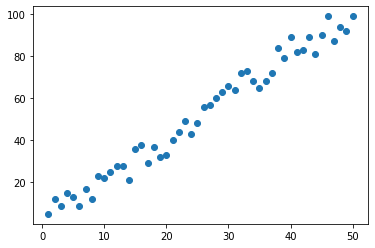

In [186]:
plt.scatter(X.numpy(), y.numpy())

In [187]:
torch.manual_seed(59)
model = nn.Linear(in_features=1, out_features=1)

In [188]:
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [189]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [190]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [191]:
for name, param in model.named_parameters():
    print(name, '\t', param)

linear.weight 	 Parameter containing:
tensor([[0.1060]], requires_grad=True)
linear.bias 	 Parameter containing:
tensor([0.9638], requires_grad=True)


In [192]:
x = torch.tensor([2.0])

In [193]:
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [194]:
x1 = np.linspace(0.0, 50.0, 50)

In [195]:
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [196]:
w1 = 0.1059
b1 = 0.9637
y1 = w1*x1 + b1

In [197]:
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

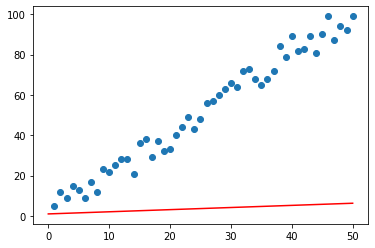

In [198]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')

In [199]:
criterion = nn.MSELoss()

In [200]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [201]:
epochs = 20

In [202]:
losses = []

In [203]:
for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f'epoch:{i} loss:{loss.item()} weights:{model.linear.weight.item()} bias:{model.linear.bias.item()}')
    optimizer.zero_grad()
          
    loss.backward()
    optimizer.step()

epoch:1 loss:3057.216796875 weights:0.10597813129425049 bias:0.9637961387634277
epoch:2 loss:1588.5311279296875 weights:3.334900379180908 bias:1.0604636669158936
epoch:3 loss:830.2999877929688 weights:1.0148327350616455 bias:0.9922628402709961
epoch:4 loss:438.8524169921875 weights:2.6817996501922607 bias:1.0425218343734741
epoch:5 loss:236.7615203857422 weights:1.4840211868286133 bias:1.0076650381088257
epoch:6 loss:132.4291229248047 weights:2.3446059226989746 bias:1.0339646339416504
epoch:7 loss:78.56572723388672 weights:1.7262253761291504 bias:1.0163217782974243
epoch:8 loss:50.75775909423828 weights:2.170504093170166 bias:1.0302516222000122
epoch:9 loss:36.4012565612793 weights:1.851245641708374 bias:1.0214954614639282
epoch:10 loss:28.989229202270508 weights:2.0806007385253906 bias:1.029038906097412
epoch:11 loss:25.162382125854492 weights:1.9157683849334717 bias:1.0248701572418213
epoch:12 loss:23.186473846435547 weights:2.034165620803833 bias:1.0291162729263306
epoch:13 loss:22.

Text(0.5, 0, 'Epoch')

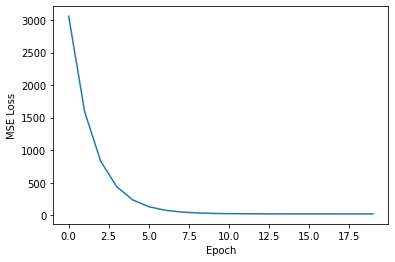

In [204]:
plt.plot(range(epochs), [loss.item() for loss in losses])

plt.ylabel('MSE Loss')
plt.xlabel('Epoch')

In [205]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*x + current_bias

In [206]:
predicted_y

array([  1.03410351,   3.05648449,   5.07886546,   7.10124644,
         9.12362741,  11.14600839,  13.16838936,  15.19077034,
        17.21315131,  19.23553229,  21.25791326,  23.28029424,
        25.30267521,  27.32505619,  29.34743716,  31.36981814,
        33.39219911,  35.41458008,  37.43696106,  39.45934203,
        41.48172301,  43.50410398,  45.52648496,  47.54886593,
        49.57124691,  51.59362788,  53.61600886,  55.63838983,
        57.66077081,  59.68315178,  61.70553276,  63.72791373,
        65.75029471,  67.77267568,  69.79505666,  71.81743763,
        73.83981861,  75.86219958,  77.88458056,  79.90696153,
        81.92934251,  83.95172348,  85.97410446,  87.99648543,
        90.01886641,  92.04124738,  94.06362835,  96.08600933,
        98.1083903 , 100.13077128])

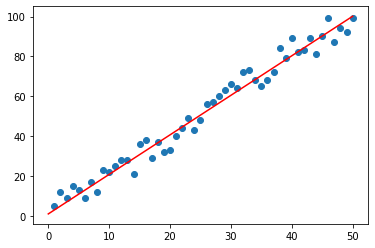

In [207]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')

In [212]:
df = pd.read_csv(r"C:\AnCodeRR\PYTORCH_NOTEBOOKS\Data\iris.csv")

In [213]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [214]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [215]:
data = df.drop('target',axis=1).values

In [216]:
labels = df['target'].values

In [217]:
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

In [218]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [219]:
len(iris)

150

In [220]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [225]:
iris_loader = DataLoader(iris, batch_size = 10, shuffle=True)

In [226]:
for i_batch, sample_batch in enumerate(iris_loader):
    print(i_batch, sample_batch)

0 [tensor([[6.7000, 3.0000, 5.2000, 2.3000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [5.6000, 2.7000, 4.2000, 1.3000],
        [6.0000, 3.0000, 4.8000, 1.8000]]), tensor([2, 1, 0, 0, 2, 1, 1, 0, 1, 2])]
1 [tensor([[5.0000, 3.2000, 1.2000, 0.2000],
        [5.5000, 2.3000, 4.0000, 1.3000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [7.0000, 3.2000, 4.7000, 1.4000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [6.4000, 2.9000, 4.3000, 1.3000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.0000, 2.7000, 5.1000, 1.6000]]), tensor([0, 1, 2, 2, 1, 0, 1, 1, 2, 1])]
2 [tensor([[6.1000, 2.8000, 4.0000, 1.3000],
        [4.9000, 2.4000, 